# Mental Health Analysis in Tech Survey
#By- Aarush Kumar
#Dated: Sept. 22,2021

In [1]:
from IPython.display import Image
Image(url='https://c4.wallpaperflare.com/wallpaper/398/120/920/zune-gathering-wallpaper-preview.jpg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings("ignore")

## Importing the required dataset.

In [3]:
data=pd.read_csv('/home/aarush100616/Downloads/Projects/Mental Health in Tech Survey Analysis/Data/survey.csv')

In [4]:
data

Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255    

In [5]:
data.shape

(1259, 27)

In [7]:
data.size

33993

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
data.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [11]:
data.describe().T

count          mean           std     min   25%   50%   75%  \
Age  1259.0  7.942815e+07  2.818299e+09 -1726.0  27.0  31.0  36.0   

              max  
Age  1.000000e+11

## Dropping the columns.

In [13]:
data.drop(columns=['state','comments'],inplace=True)

## Imputing the null values.

In [14]:
print(data['self_employed'].value_counts())
data['self_employed'].fillna('No',inplace=True)

No     1095
Yes     146
Name: self_employed, dtype: int64


In [15]:
print(data['work_interfere'].value_counts())
data['work_interfere'].fillna('Sometimes',inplace=True)

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [16]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

## Exploratory Data Analysis.

In [17]:
sns.boxplot(data['Age'])

In [18]:
data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True) 

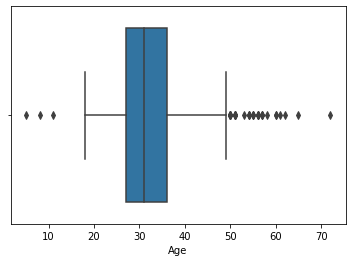

In [19]:
sns.boxplot(data['Age'])

In [20]:
data['Gender']=[m.lower() for m in data['Gender']]
data['Gender'].value_counts()

male                                              818
female                                            183
m                                                 150
f                                                  53
woman                                               4
make                                                4
cis male                                            3
male                                                3
female (trans)                                      2
female                                              2
man                                                 2
trans woman                                         1
queer                                               1
enby                                                1
ostensibly male, unsure what that really means      1
nah                                                 1
androgyne                                           1
trans-female                                        1
genderqueer                 

In [21]:
plt.pie(data['Country'].value_counts(),labels=data['Country'].unique(),labeldistance=1.1)

([<matplotlib.patches.Wedge at 0x7fc0c73e9650>,
 [Text(-0.32836625761287086, 1.0498455128547808, 'United States'),
  Text(-0.5307982415494626, -0.9634589907038071, 'Canada'),
  Text(0.15108887646382577, -1.0895742982508807, 'United Kingdom'),
  Text(0.4594617878331475, -0.9994472800108908, 'Bulgaria'),
  Text(0.6313102240012489, -0.9008037528071767, 'France'),
  Text(0.7470348568847083, -0.8074273481863515, 'Portugal'),
  Text(0.8385012634298498, -0.7119800778298125, 'Netherlands'),
  Text(0.8960335261541189, -0.638062630160877, 'Switzerland'),
  Text(0.9312918582830189, -0.5854019770172985, 'Poland'),
  Text(0.9567346551113993, -0.5428248333568315, 'Australia'),
  Text(0.9764531353585771, -0.5064970626256429, 'Germany'),
  Text(0.9936136354230528, -0.47194485218231264, 'Russia'),
  Text(1.0095519595041866, -0.43681213474588493, 'Mexico'),
  Text(1.0242485029626975, -0.4011421246624108, 'Brazil'),
  Text(1.036767567526561, -0.3675772176360469, 'Slovenia'),
  Text(1.0473479343679597, -0

## Bivariate and Multivariate Analysis.

In [22]:
country=data.groupby(data['Country'])

In [23]:
country['Age'].aggregate(np.median).sort_values()

Country
Bahamas, The               8.0
Slovenia                  19.0
Georgia                   20.0
India                     23.0
Austria                   24.0
Bosnia and Herzegovina    25.0
Nigeria                   25.0
Uruguay                   26.0
Russia                    26.0
Moldova                   26.0
Israel                    26.0
Sweden                    27.0
Hungary                   27.0
Australia                 27.0
Colombia                  27.0
Bulgaria                  27.5
France                    28.0
Brazil                    28.0
Canada                    29.0
Romania                   29.0
Latvia                    29.0
Poland                    29.0
Singapore                 29.5
Spain                     30.0
Belgium                   30.0
Switzerland               30.0
Germany                   30.0
New Zealand               30.0
Philippines               31.0
Mexico                    31.0
United Kingdom            31.0
Ireland                   32.0


In [24]:
country['treatment','remote_work','self_employed'].describe()

treatment                  remote_work              \
                           count unique  top freq       count unique  top   
Country                                                                     
Australia                     21      2  Yes   13          21      2   No   
Austria                        3      1   No    3           3      2  Yes   
Bahamas, The                   1      1  Yes    1           1      1  Yes   
Belgium                        6      2   No    5           6      1   No   
Bosnia and Herzegovina         1      1   No    1           1      1  Yes   
Brazil                         6      2   No    4           6      2   No   
Bulgaria                       4      2   No    2           4      2  Yes   
Canada                        72      2  Yes   37          72      2   No   
China                          1      1   No    1           1      1  Yes   
Colombia                       2      1   No    2           2      1   No   
Costa Rica                     1      1   No    1           1      1  Yes   
Croatia                        2      1  Yes    2           2      1  Yes   
Czech Republic                 1      1   No    1           1      1   No   
Denmark                        2      1  Yes    2           2      1   No   
Finland                        3      2   No    2           3      2   No   
France                        13      2   No   11          13      2   No   
Georgia                        1      1   No    1           1      1   No   
Germany                       45      2   No   24          45      2   No   
Greece                         2      1   No    2           2      1  Yes   
Hungary                        1      1   No    1           1      1  Yes   
India                         10      2   No    7          10      2   No   
Ireland                       27      2   No   14          27      2   No   
Israel                         5      1   No    5           5      1   No   
Italy                          7      2   No    6           7      1   No   
Japan                          1      1  Yes    1           1      1  Yes   
Latvia                         1      1   No    1           1      1   No   
Mexico                         3      2   No    2           3      2  Yes   
Moldova                        1      1  Yes    1           1      1   No   
Netherlands                   27      2   No   18          27      2   No   
New Zealand                    8      2  Yes    5           8      2   No   
Nigeria                        1      1   No    1           1      1   No   
Norway                         1      1   No    1           1      1   No   
Philippines                    1      1   No    1           1      1   No   
Poland                         7      2  Yes    4           7      2  Yes   
Portugal                       2      1   No    2           2      1   No   
Romania                        1      1   No    1           1      1  Yes   
Russia                         3      1   No    3           3      2   No   
Singapore                      4      2   No    3           4      2  Yes   
Slovenia                       1      1  Yes    1           1      1   No   
South Africa                   6      2  Yes    4           6      2  Yes   
Spain                          1      1   No    1           1      1   No   
Sweden                         7      2   No    5           7      1   No   
Switzerland                    7      2   No    4           7      1   No   
Thailand                       1      1   No    1           1      1   No   
United Kingdom               184      2   No   92         184      2   No   
United States                748      2  Yes  408         748      2   No   
Uruguay                        1      1   No    1           1      1  Yes   

                            self_employed                   
                       freq         count unique  top freq  
Country                                           

In [25]:
s_employ=data.groupby(['self_employed'])
s_employ['treatment'].describe()

count unique  top freq
self_employed                       
No             1110      2  Yes  557
Yes             144      2  Yes   76

In [26]:
treat=data.groupby(['treatment'])
treat['Age'].describe()

count       mean       std  min   25%   50%   75%   max
treatment                                                         
No         621.0  31.458937  7.084081  5.0  27.0  31.0  35.0  65.0
Yes        633.0  32.568720  7.615281  8.0  27.0  32.0  37.0  72.0

In [27]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [28]:
treat['tech_company','work_interfere'].describe()

tech_company                  work_interfere                       
                 count unique  top freq          count unique        top freq
treatment                                                                    
No                 621      2  Yes  517            621      4  Sometimes  366
Yes                633      2  Yes  511            633      4  Sometimes  361

In [29]:
sns.barplot(data['leave'].unique(),data['leave'].value_counts())

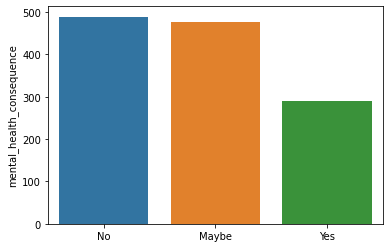

In [30]:
sns.barplot(data['mental_health_consequence'].unique(),data['mental_health_consequence'].value_counts())

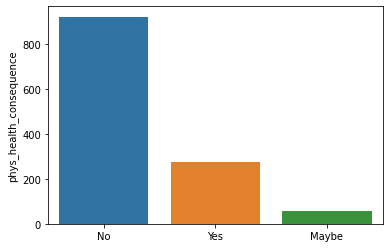

In [31]:
sns.barplot(data['phys_health_consequence'].unique(),data['phys_health_consequence'].value_counts())

In [32]:
plt.pie(data['coworkers'].value_counts(),labels=data['coworkers'].unique())
data['coworkers'].value_counts()

Some of them    772
No              258
Yes             224
Name: coworkers, dtype: int64

In [37]:
print(data['mental_vs_physical'].value_counts())
plt.hist(data['mental_vs_physical'],histtype='step')

Don't know    574
Yes           342
No            338
Name: mental_vs_physical, dtype: int64


(array([342.,   0.,   0.,   0.,   0., 574.,   0.,   0.,   0., 338.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 1 Patch objects>)

## Conclusion and Inferences.

1. This case study is majorly based on cases in the Western world.
2. Cases show that more than 50% of people surveyed in countries like US,Australia and Canada undergo treatment for mental ailments.
3. People who are not more prone to work at home are usually bored and filled with anxiety leading to degradation in mental health.
4. People who are in the early 30's usually undergo treatment but there are extreme cases like 8 years and 72 years people recieving the same treatment.
5. It is interesting to find that people face mental trauma regardless of whether they are self employed or not.
6. The surveyed people agree that their mental health somewhat affects their productivity at work.
7. People feel that their employers somewhat easily sanction leave for mental health issues.The reason maybe that the employer does not want to take any risk of overloading the patient with work.
8. People feel that sharing about their mental or physical health with employers would help them a bit but they are reluctant to share the same with their coworkers.They would prefer to share with only some of the coworkers.
9. People dont know whether the employer considers mental health issues as seriously as the physical ones.The ambiguity still remains about people's reaction towards mental health.